## Q1. Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good".

In [1]:
# Imporing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Importing Datset

data=pd.read_csv("C:/Users/Dhanashree/Downloads/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.shape

(600, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data["Target"] = pd.cut(data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [7]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])

label_encoder = preprocessing.LabelEncoder()
data['Urban']= label_encoder.fit_transform(data['Urban'])

data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [8]:
data['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [9]:
label_encoder = preprocessing.LabelEncoder()
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])

label_encoder = preprocessing.LabelEncoder()
data['Target']= label_encoder.fit_transform(data['Target'])

data.head() 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [10]:
x=data.iloc[:,0:8]
y=data['Target']

x.drop(["City.Population"],axis=1,inplace=True)
x

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0
...,...,...,...,...,...,...
595,1,0,76340,7,1,0
596,1,0,69967,2,1,0
597,0,0,47334,0,1,0
598,1,1,98592,17,0,0


In [11]:
y # with Marital.Status

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Target, Length: 600, dtype: int32

In [12]:
colnames = list(data.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Target']

In [13]:
# Splitting data in to training and testing process ( with 'marital status' feature)

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

## With Target feature

### 1. Buil a Decision Tree Clasifier using Entropy

In [16]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [17]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=5)

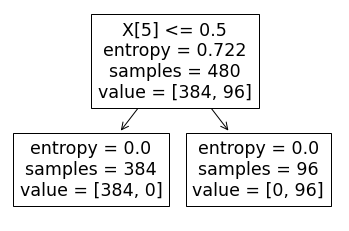

In [18]:
#Ploting the decision tree

tree.plot_tree(model);

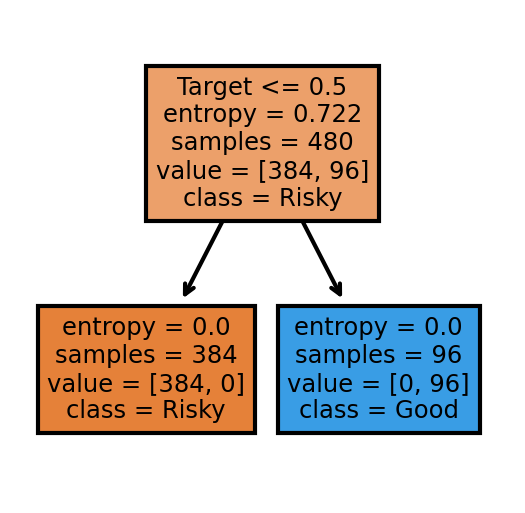

In [19]:
fn=['Undergrad','Marital.Status','Taxable.Income','Work.Experience','Urban','Target']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [20]:
# predicting on test data set 
prediction = model.predict(x_test)

# getting the count of each category  
pd.Series(prediction).value_counts() 

0    92
1    28
dtype: int64

In [21]:
prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [22]:
# getting the two way table to understand the correct and wrong predictions

pd.crosstab(y_test,prediction)

col_0,0,1
Target,,
0,92,0
1,0,28


In [23]:
# Accuracy Measuring

np.mean(prediction==y_test)

1.0

### 2. With Gini Criteria build a Decision Tree Classifier

In [25]:
model2_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)
model2_gini

DecisionTreeClassifier(max_depth=5)

In [26]:
model2_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=5)

In [27]:
# Predicting on test data

prediction2=model.predict(x_test)

In [28]:
pd.Series(prediction2).value_counts()

0    92
1    28
dtype: int64

In [29]:
np.mean(prediction2==y_test)

1.0

### 3. Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor

model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train) 

DecisionTreeRegressor()

In [32]:
# accuracy

model3.score(x_test,y_test)

1.0

## With Matrital Status
### 1. Buil a Decision Tree Clasifier using Entropy

In [34]:
x1=data.iloc[:,0:8]
y1=data['Marital.Status']

In [35]:
# Splitting data in to training and testing process ( with 'marital status' feature)

x1_train, x1_test,y1_train,y1_test = train_test_split(x,y, test_size=0.2,random_state=40)

modelx = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
modelx.fit(x1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

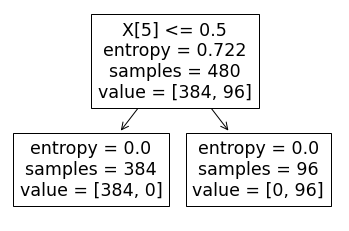

In [36]:
#Ploting the decision tree

tree.plot_tree(modelx);

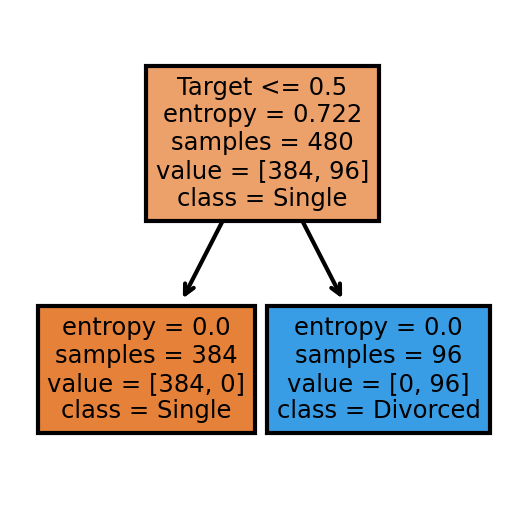

In [37]:
fn=['Undergrad','Marital.Status','Taxable.Income','Work.Experience','Urban','Target']
cn=['Single', 'Divorced', 'Married']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(modelx,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [38]:
# predicting on test data set
predictionx = model.predict(x_test) 

# getting the count of each category  
pd.Series(predictionx).value_counts()

0    92
1    28
dtype: int64

In [39]:
predictionx

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [40]:
# getting the two way table to understand the correct and wrong predictions

pd.crosstab(y_test,predictionx)

col_0,0,1
Target,,
0,92,0
1,0,28


In [41]:
# Accuracy Measuring

np.mean(predictionx==y_test)

1.0

### 2. With Gini Criteria build a Decision Tree Classifier

In [43]:
model2_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)
model2_gini

DecisionTreeClassifier(max_depth=5)

In [44]:
model2_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=5)

In [45]:
# Predicting on test data

predictiony=model.predict(x_test)
predictiony

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [46]:
pd.Series(predictiony).value_counts()

0    92
1    28
dtype: int64

### 3. Decision Tree Regression

In [48]:
modelA = DecisionTreeRegressor()
modelA.fit(x_train, y_train) 

DecisionTreeRegressor()

In [49]:
# accuracy

modelA.score(x_test,y_test)

1.0